### **BLINKIT ANALYSIS**

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Raw Data

In [2]:
df=pd.read_csv("/Users/savneetkaur/Downloads/blinkit_data.csv")

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


#### Size of data

In [4]:
df.shape

(8523, 12)

#### Field Info

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Datatype of data

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

#### Checking Null Values

In [7]:
df.isnull()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,True,False,False
8519,False,False,False,False,False,False,False,False,False,True,False,False
8520,False,False,False,False,False,False,False,False,False,True,False,False
8521,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

#### Handling Null Values

In [9]:
df["Item Weight"].fillna(df["Item Weight"].mean())

0       15.100000
1       11.800000
2       13.850000
3       12.150000
4       19.600000
          ...    
8518    12.857645
8519    12.857645
8520    12.857645
8521    12.857645
8522    12.857645
Name: Item Weight, Length: 8523, dtype: float64

#### Handling Data discrepancies

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# replace lf, low fat to Low Fat to remove data discrepancies
df.replace(["LF","low fat"],"Low Fat",inplace=True)

In [12]:
df.replace("reg","Regular",inplace=True)

In [13]:
# count of Item Fat content
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Checking Duplicate Values

In [14]:
# check for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

### KPI's

In [15]:
# Total Sales
total_sales=df["Sales"].sum()

# Average Sales
avg_sales=df["Sales"].mean()

# Number of Items Sold
no_of_items_sold=df["Sales"].count()  #check again

# Average ratings
avg_ratings=df["Rating"].mean()

In [16]:
print(f"Total Sales : ${total_sales:,.0f}")
print(f"Average Sales : ${avg_sales:,.2f}")
print(f"Number of Items Sold : {no_of_items_sold}")
print(f"Average Rating : {avg_ratings:,.2f}")

Total Sales : $1,201,681
Average Sales : $140.99
Number of Items Sold : 8523
Average Rating : 3.97


### Charts

#### Total Sales By Fat Content

Text(0.5, 1.0, 'Top 10 Selling Products ')

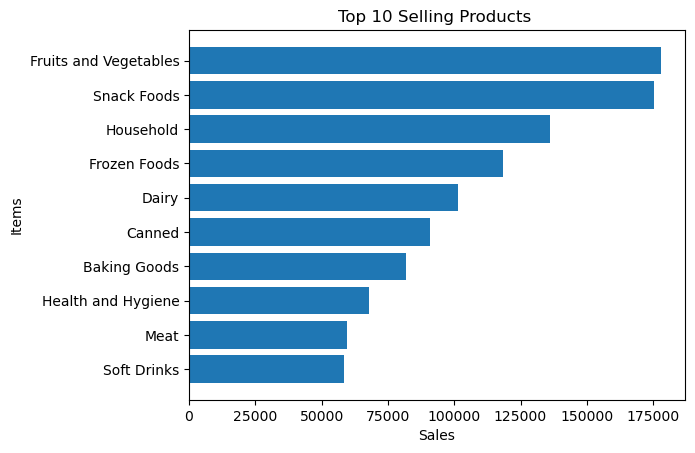

In [31]:
top_items=df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False).head(10)
plt.barh(top_items.index,top_items.values)
plt.gca().invert_yaxis()
plt.xlabel("Sales")
plt.ylabel("Items")
plt.title("Top 10 Selling Products ")


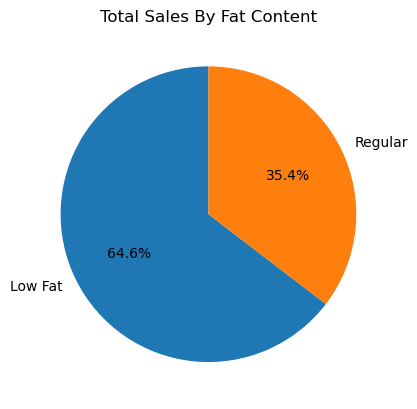

In [17]:
sales_by_fat_content=df.groupby("Item Fat Content")["Sales"].sum()
plt.pie(sales_by_fat_content,labels=sales_by_fat_content.index,autopct='%.1f%%',
       startangle=90)
plt.title("Total Sales By Fat Content")
plt.show()

#### Total Sales by Item Type

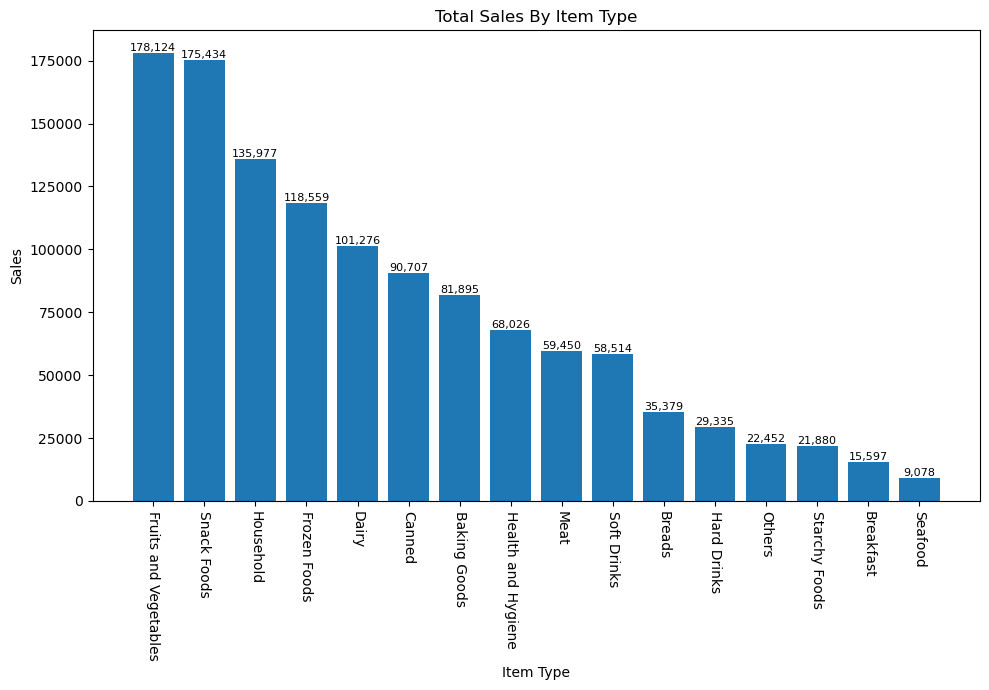

In [18]:
sales_by_item_type=df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
bars=plt.bar(sales_by_item_type.index,sales_by_item_type.values)

plt.title("Total Sales By Item Type")
plt.xticks(rotation=-90)  
plt.xlabel("Item Type")
plt.ylabel("Sales")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 , bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
    
plt.tight_layout()  
plt.show()

#### Fat content by Outlet for Total Sales

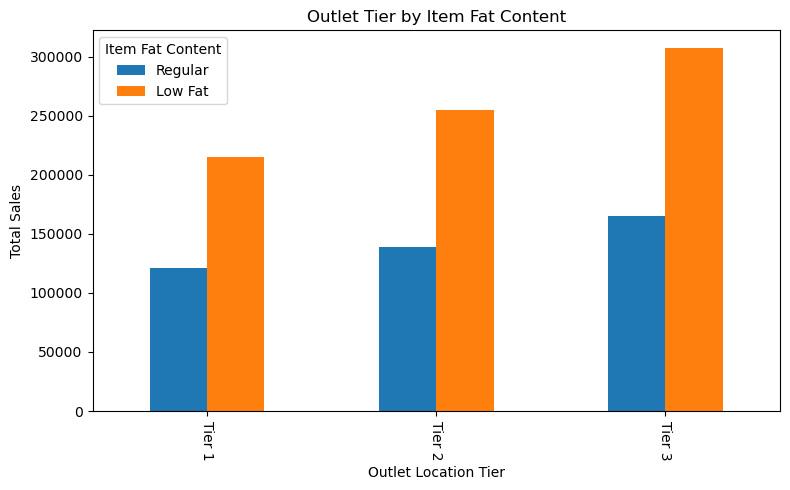

In [19]:
grouped=df.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
grouped=grouped[["Regular","Low Fat"]]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')

plt.xlabel("Outlet Location Tier")
plt.xticks(rotation=-90)
plt.ylabel("Total Sales")
plt.legend(title="Item Fat Content")
plt.tight_layout()
plt.show()

#### Sales By Outlet Establishment Year

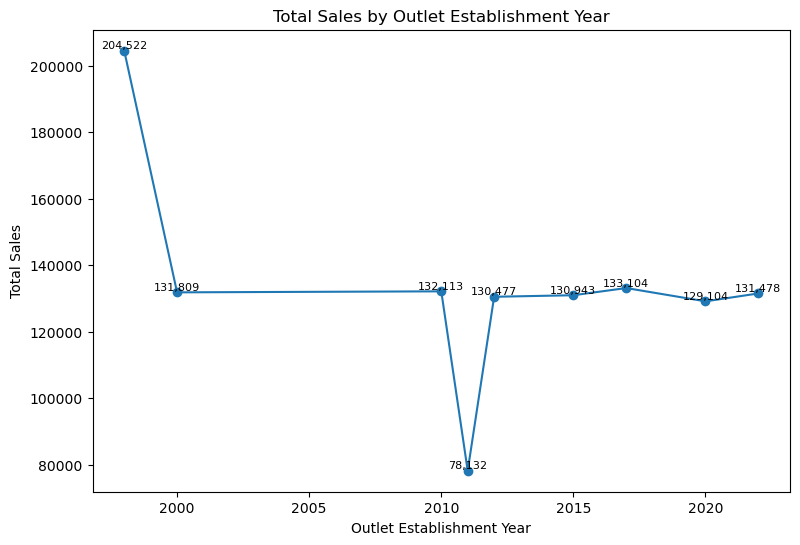

In [20]:
sales_by_year=df.groupby("Outlet Establishment Year")["Sales"].sum()

plt.figure(figsize=(9,6))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o')

plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet Establishment Year")

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha="center",va="bottom",fontsize=8)


#### Sales By Outlet Size

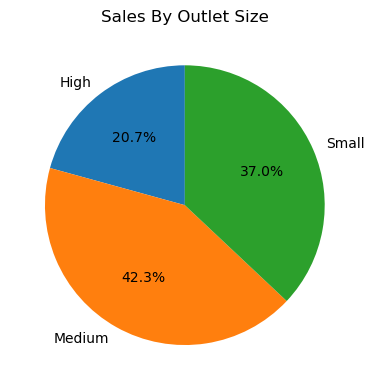

In [21]:
sales_by_outlet_size=df.groupby("Outlet Size")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_outlet_size,labels=sales_by_outlet_size.index,autopct='%1.1f%%',startangle=90)
plt.title("Sales By Outlet Size")
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Location Type

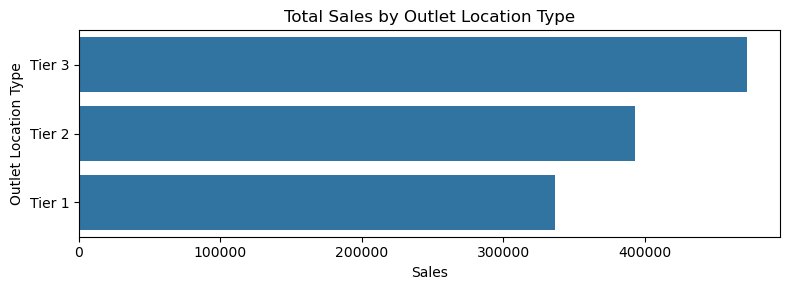

In [22]:
sales_by_location=df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)
plt.xlabel('Sales')
plt.ylabel('Outlet Location Type')
plt.title("Total Sales by Outlet Location Type")

plt.tight_layout()
plt.show()

#### Sales by Item Type

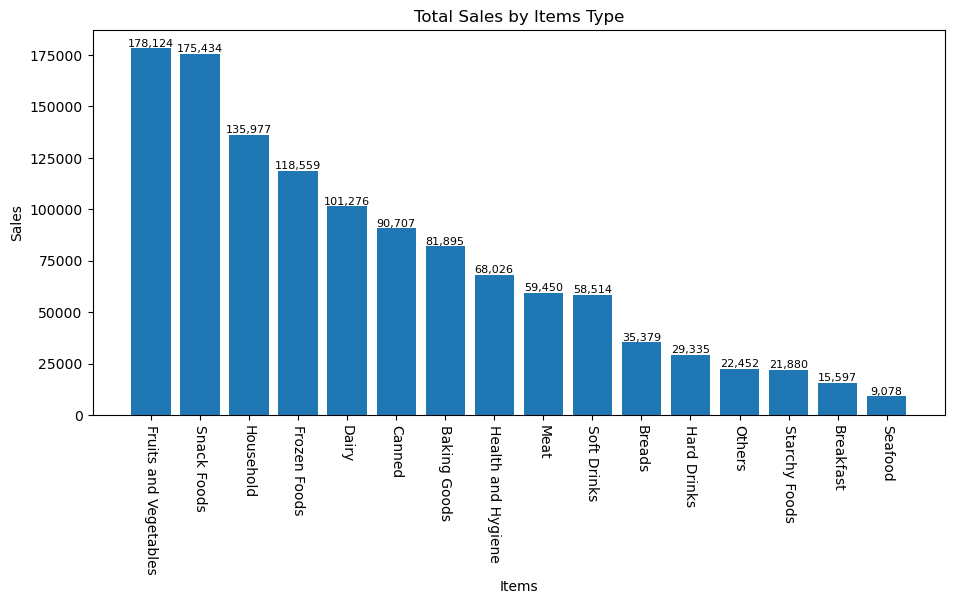

In [23]:
sales_by_item=df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(11,5))
bar=plt.bar(sales_by_item.index,sales_by_item.values)
plt.xticks(rotation=-90)
plt.xlabel("Items")
plt.ylabel("Sales")
plt.title("Total Sales by Items Type")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 , bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
    
plt.show()

####  Average Sales per Item Type(Box Plot)

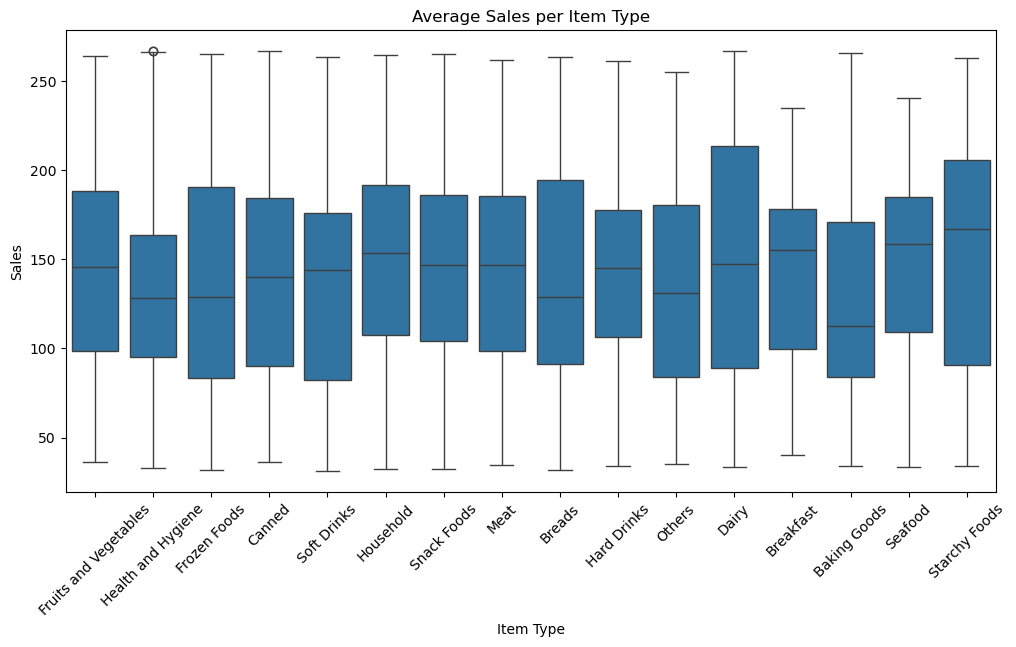

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Item Type", y="Sales", data=df)
plt.xticks(rotation=45)
plt.title("Average Sales per Item Type")
plt.show()


####  Average Sales per Item Type(Bar Plot)

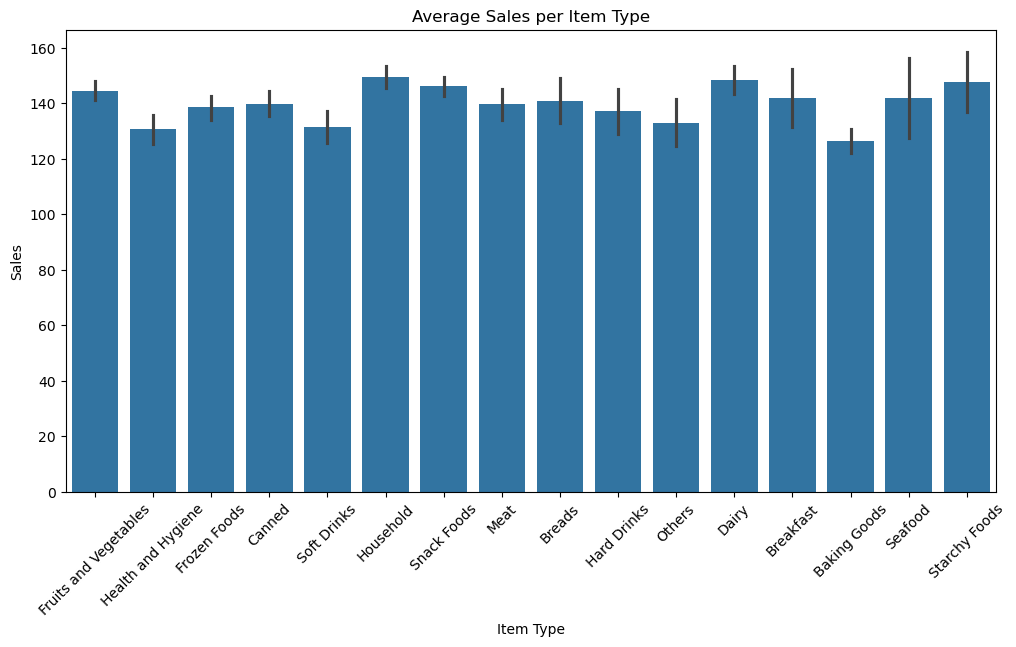

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x="Item Type", y="Sales", data=df)
plt.xticks(rotation=45)
plt.title("Average Sales per Item Type")
plt.show()

#### Item Visibility vs Sales

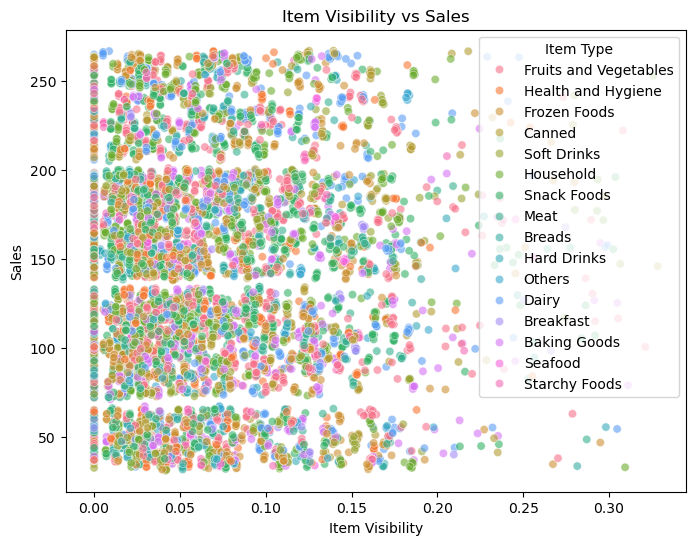

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Item Visibility", y="Sales", hue="Item Type", alpha=0.6, data=df)
plt.title("Item Visibility vs Sales")
plt.show()
# redo

#### Sales by Outlet Type

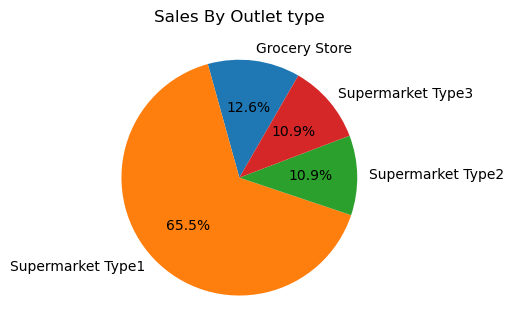

In [27]:
sales_by_outlet_type=df.groupby("Outlet Type")["Sales"].sum()

plt.figure(figsize=(5,5))
plt.pie(sales_by_outlet_type,labels=sales_by_outlet_type.index,autopct='%1.1f%%',startangle=60)
plt.title("Sales By Outlet type")
plt.tight_layout()
plt.show()

#### Sales by Outlet Size

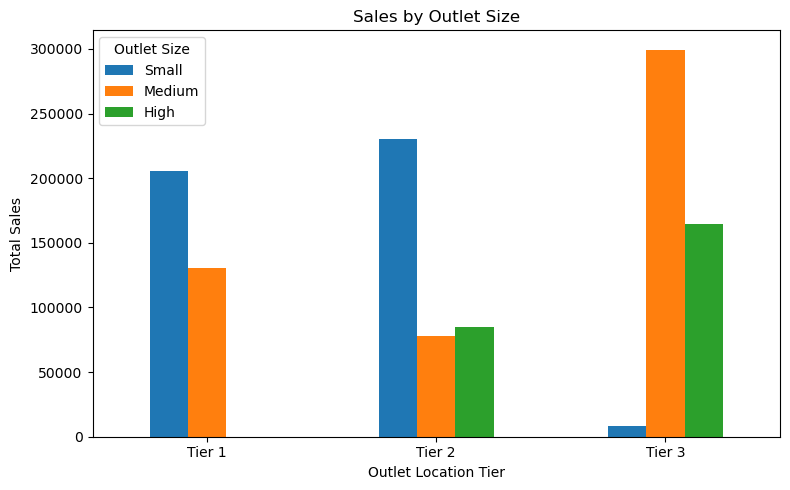

In [28]:
grouped=df.groupby(["Outlet Location Type","Outlet Size"])["Sales"].sum().unstack()
grouped=grouped[["Small","Medium","High"]]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Sales by Outlet Size')

plt.xlabel("Outlet Location Tier")
plt.xticks(rotation=0)
plt.ylabel("Total Sales")
plt.legend(title="Outlet Size")
plt.tight_layout()
plt.show()

#### Outlet Age vs Average Sales

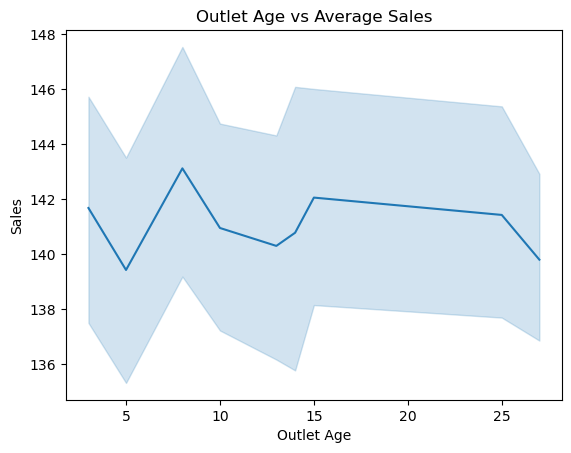

In [29]:
df["Outlet Age"] = 2025 - df["Outlet Establishment Year"]

sns.lineplot(x="Outlet Age", y="Sales", data=df, estimator=np.mean)
plt.title("Outlet Age vs Average Sales")
plt.show()

#### Top 10 Selling Products

#### Ratings vs Sales

Text(0.5, 1.0, 'Rating vs Sales')

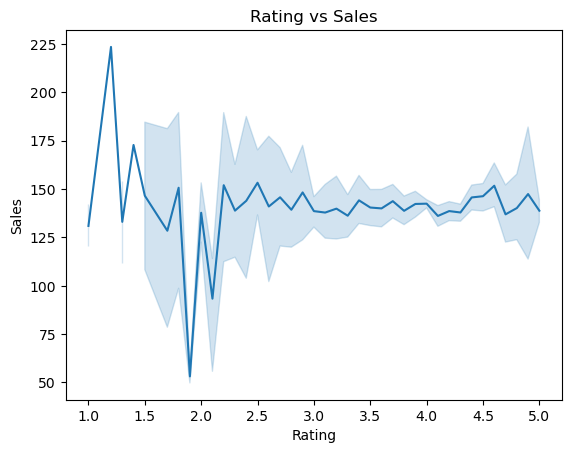

In [30]:
sns.lineplot(x="Rating",y="Sales",data=df,estimator=np.mean)
plt.title("Rating vs Sales")